In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [54]:
netflix_overall=pd.read_csv("netflix_titles.csv")
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [55]:
netflix_overall.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [56]:
netflix_overall.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [57]:
netflix_shows=netflix_overall[netflix_overall['type']=='TV Show']
netflix_movies=netflix_overall[netflix_overall['type']=='Movie']

Text(0.5, 1.0, 'Movies and Shows Numbers')

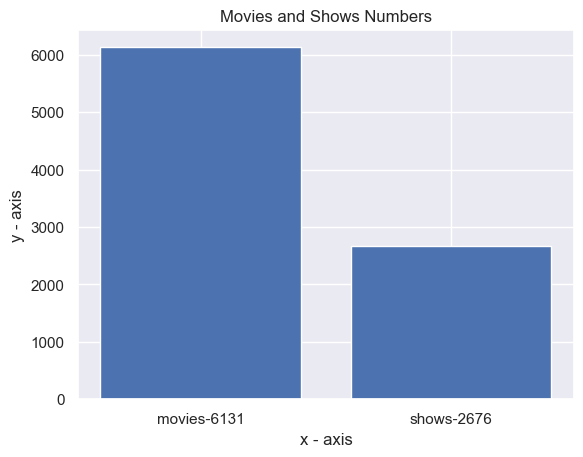

In [58]:
left = [1, 2]
height = [len(netflix_movies), len(netflix_shows)]
tick_label = ['movies-'+str(len(netflix_movies)),'shows-'+str(len(netflix_shows))]
plt.bar(left, height, tick_label = tick_label)

plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Movies and Shows Numbers')

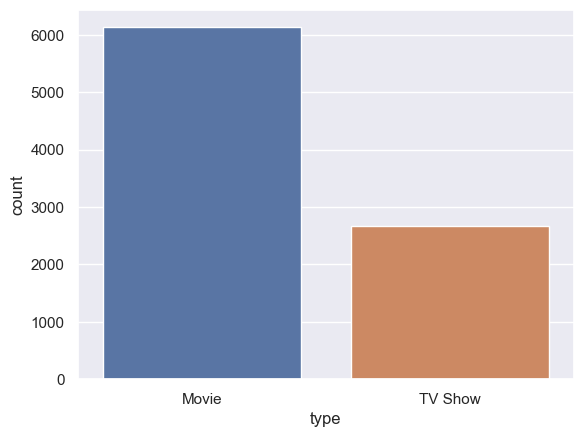

In [59]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_overall)

In [60]:
list(netflix_overall.country.drop_duplicates())

['United States',
 'South Africa',
 nan,
 'India',
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
 'United Kingdom',
 'Germany, Czech Republic',
 'Mexico',
 'Turkey',
 'Australia',
 'United States, India, France',
 'Finland',
 'China, Canada, United States',
 'South Africa, United States, Japan',
 'Nigeria',
 'Japan',
 'Spain, United States',
 'France',
 'Belgium',
 'United Kingdom, United States',
 'United States, United Kingdom',
 'France, United States',
 'South Korea',
 'Spain',
 'United States, Singapore',
 'United Kingdom, Australia, France',
 'United Kingdom, Australia, France, United States',
 'United States, Canada',
 'Germany, United States',
 'South Africa, United States',
 'United States, Mexico',
 'United States, Italy, France, Japan',
 'United States, Italy, Romania, United Kingdom',
 'Australia, United States',
 'Argentina, Venezuela',
 'United States, United Kingdom, Canada',
 'China, Hong Kong',
 'Russia',
 'Canada',
 'Hong Kong',
 'United St

c:\Users\Asad Ansari\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='country', ylabel='count'>

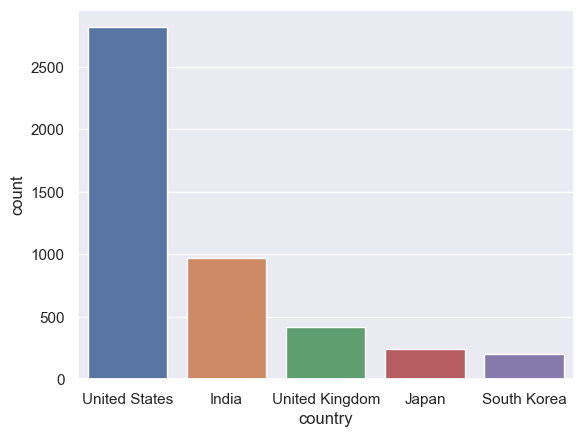

In [61]:
sns.countplot(netflix_overall.country, order=netflix_overall.country.value_counts().iloc[:5].index)

Movies Rating Analysis


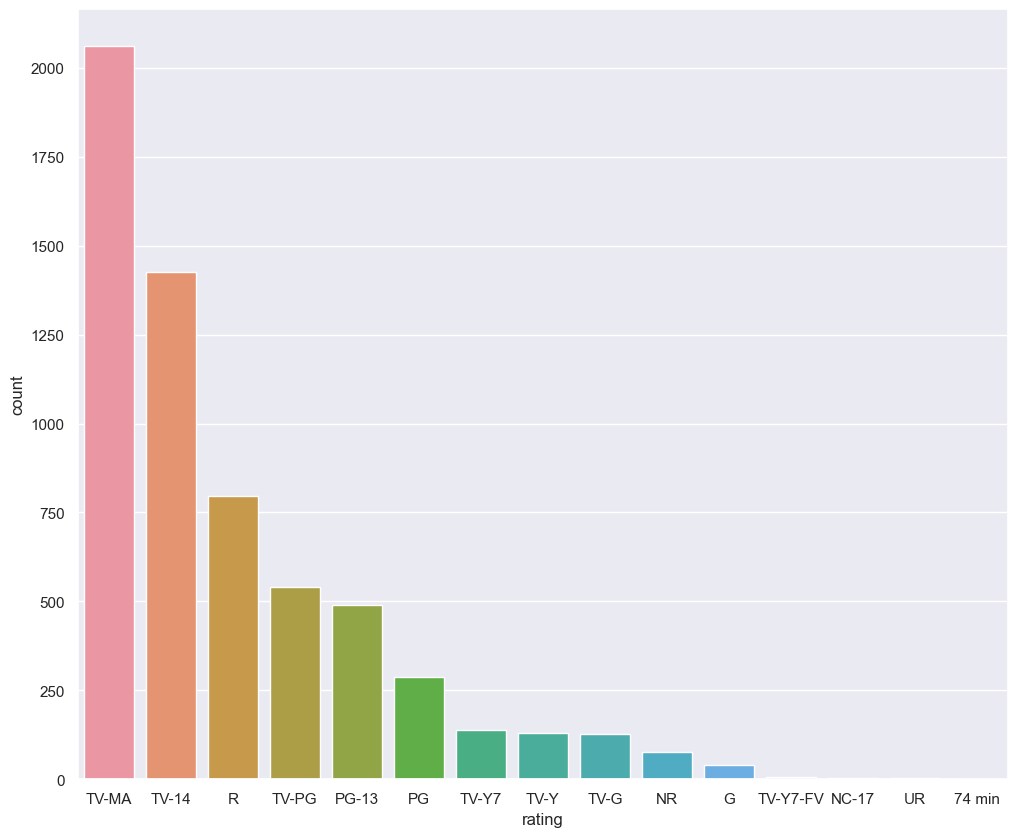

In [62]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, order=netflix_movies['rating'].value_counts().index[0:15])

Time Series

Text(0.5, 1.0, 'Movies vs Shows Time Series')

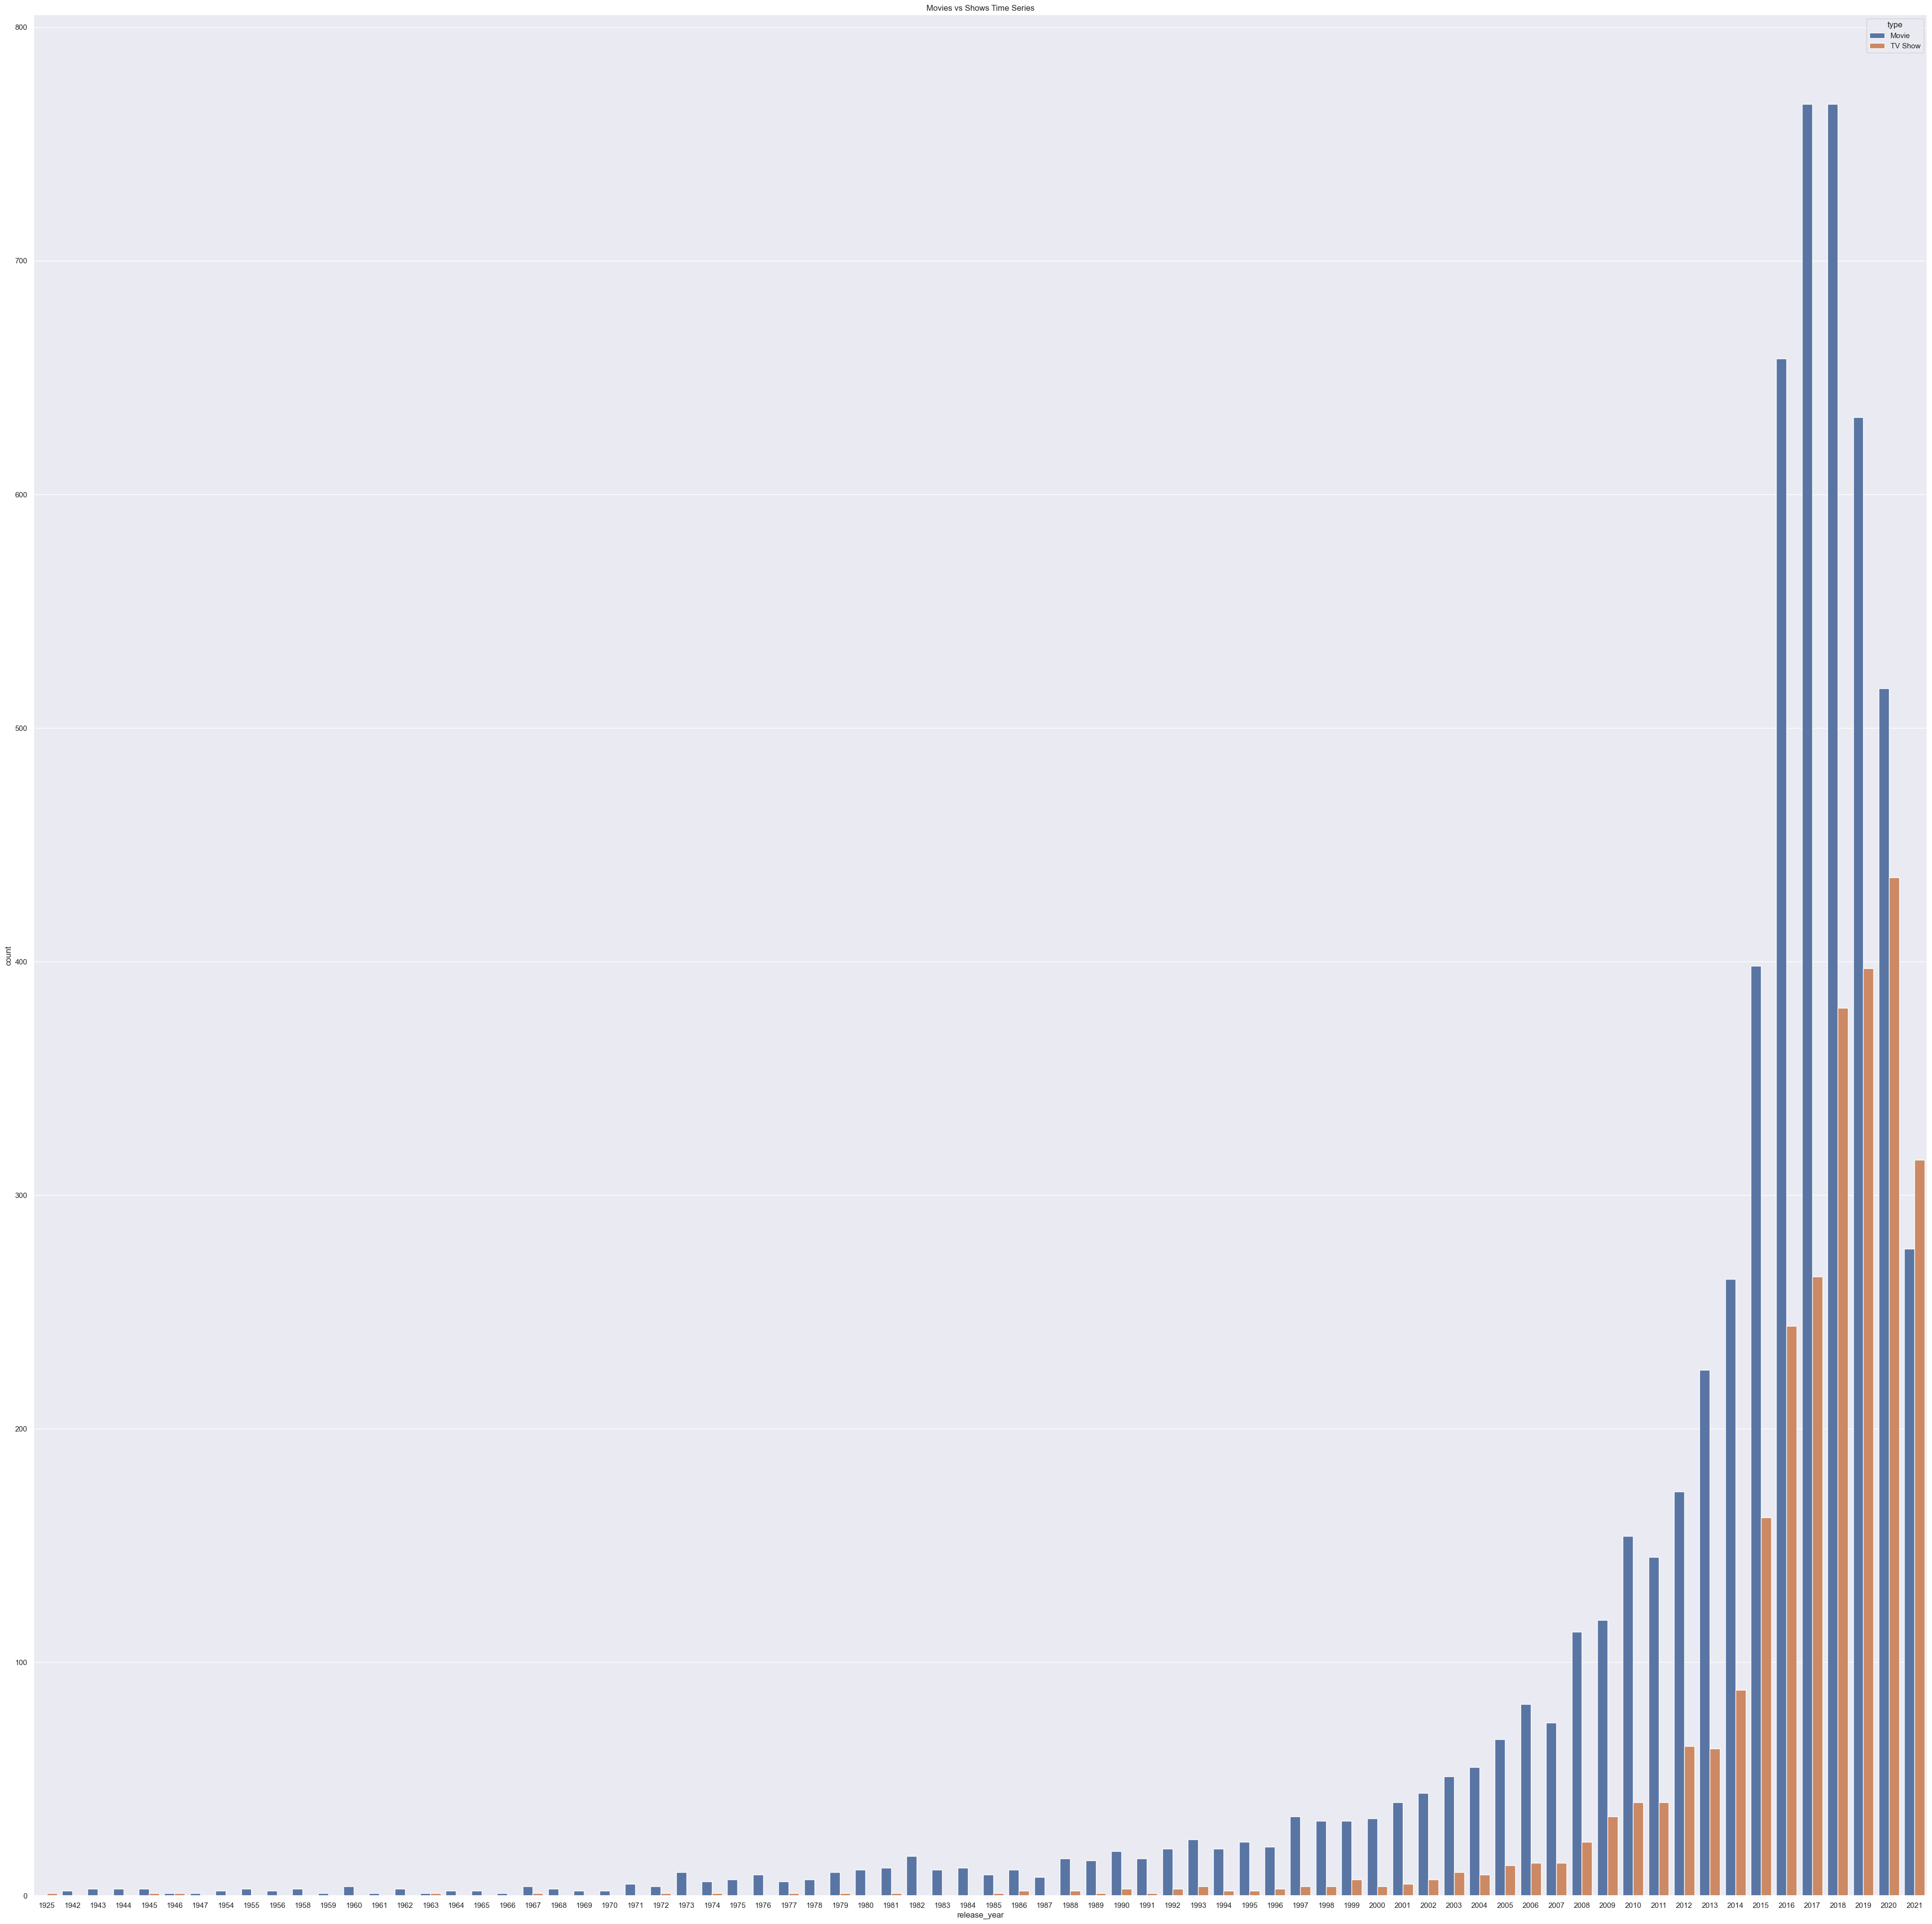

In [63]:
plt.figure(figsize=(50,50))
sns.countplot(data = netflix_overall, x = "release_year",hue = "type" )
plt.title("Movies vs Shows Time Series")

TF-IDF vectorizing

In [64]:
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix_overall['description'] = netflix_overall['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_overall['description'])

tfidf_matrix.shape

(8807, 18895)

Cosine SIM

In [65]:
#Computing cosine - similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.         0.         ... 0.         0.01538292 0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.02230089]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.01538292 0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.02230089 ... 0.         0.         1.        ]]


In [66]:
indices = pd.Series(netflix_overall.index, index=netflix_overall['title']).drop_duplicates()
print(indices)

title
Dick Johnson Is Dead        0
Blood & Water               1
Ganglands                   2
Jailbirds New Orleans       3
Kota Factory                4
                         ... 
Zodiac                   8802
Zombie Dumb              8803
Zombieland               8804
Zoom                     8805
Zubaan                   8806
Length: 8807, dtype: int64


In [67]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    return netflix_overall['title'].iloc[movie_indices]

In [68]:
get_recommendations('Kota Factory')

2272                     Drishyam
266          The Creative Indians
2091             The Bridge Curse
4076    She's Dating the Gangster
805                   Racket Boys
2690                       Code 8
1727               Girl's Revenge
8232              The Bye Bye Man
8612            Train of the Dead
2362               The Politician
Name: title, dtype: object

Using content based filtering


In [69]:
df = netflix_overall.fillna('')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,,,,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,,,,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Cleaning data making all lower case

In [70]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [71]:
features=['title','director','cast','listed_in','description']
df = df[features]

In [72]:
for feature in features:
    df[feature] = df[feature].apply(clean_data)
    
df

C:\Users\Asad Ansari\AppData\Local\Temp\ipykernel_15884\2252143413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = df[feature].apply(clean_data)


,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."
2,ganglands,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...","crimetvshows,internationaltvshows,tvaction&adv...","toprotecthisfamilyfromapowerfuldruglord,skille..."
3,jailbirdsneworleans,,,"docuseries,realitytv","feuds,flirtationsandtoilettalkgodownamongthein..."
4,kotafactory,,"mayurmore,jitendrakumar,ranjanraj,alamkhan,ahs...","internationaltvshows,romantictvshows,tvcomedies",inacityofcoachingcentersknowntotrainindia’sfin...
...,...,...,...,...,...
8802,zodiac,davidfincher,"markruffalo,jakegyllenhaal,robertdowneyjr.,ant...","cultmovies,dramas,thrillers","apoliticalcartoonist,acrimereporterandapairofc..."
8803,zombiedumb,,,"kids'tv,koreantvshows,tvcomedies","whilelivingaloneinaspookytown,ayounggirlbefrie..."
8804,zombieland,rubenfleischer,"jesseeisenberg,woodyharrelson,emmastone,abigai...","comedies,horrormovies","lookingtosurviveinaworldtakenoverbyzombies,ado..."
8805,zoom,peterhewitt,"timallen,courteneycox,chevychase,katemara,ryan...","children&familymovies,comedies","draggedfromcivilianlife,aformersuperheromusttr..."


Creating bag of words for rows


In [73]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [74]:
df['soup'] = df.apply(create_soup, axis=1)

C:\Users\Asad Ansari\AppData\Local\Temp\ipykernel_15884\3147030762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['soup'] = df.apply(create_soup, axis=1)


In [75]:
print(df['soup'])

0       dickjohnsonisdead kirstenjohnson  documentarie...
1       blood&water  amaqamata,khosingema,gailmabalane...
2       ganglands julienleclercq samibouajila,tracygot...
3       jailbirdsneworleans   docuseries,realitytv feu...
4       kotafactory  mayurmore,jitendrakumar,ranjanraj...
                              ...                        
8802    zodiac davidfincher markruffalo,jakegyllenhaal...
8803    zombiedumb   kids'tv,koreantvshows,tvcomedies ...
8804    zombieland rubenfleischer jesseeisenberg,woody...
8805    zoom peterhewitt timallen,courteneycox,chevych...
8806    zubaan mozezsingh vickykaushal,sarah-janedias,...
Name: soup, Length: 8807, dtype: object


In [76]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [77]:
print(cosine_sim2)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.04583492 ... 0.         0.         0.        ]
 [0.         0.04583492 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.06933752 0.        ]
 [0.         0.         0.         ... 0.06933752 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [78]:
df=df.reset_index()
indices = pd.Series(df.index, index=df['title'])

In [79]:
def get_recommendations_new(title, cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    return netflix_overall['title'].iloc[movie_indices]

In [80]:
get_recommendations_new('Kota Factory', cosine_sim2)

2982                                        Find Yourself
1038                                       Dancing Angels
7438                     Melodies of Life - Born This Way
3293                                        Little Things
6508    Club Friday To Be Continued - My Beautiful Tomboy
7872                                           Rishta.com
3463                                      College Romance
4171                                    The Perfect Match
4487                                 Accidentally in Love
5703                                          Refresh Man
Name: title, dtype: object

We can see that the content based filter method is more accurate and provides us with better reccomendations

In [81]:
df2 = netflix_overall.fillna('')

In [82]:
df2.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

converting all to lowercase

In [83]:
def converter(df2):
    for i in (df2.columns):
        df2[i] = df2[i].astype(str)
        df2[i]= df2[i].str.lower()
    return df2   
converter(df2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,movie,dick johnson is dead,kirsten johnson,,united states,"september 25, 2021",2020,pg-13,90 min,documentaries,"as her father nears the end of his life, filmm..."
1,s2,tv show,blood & water,,"ama qamata, khosi ngema, gail mabalane, thaban...",south africa,"september 24, 2021",2021,tv-ma,2 seasons,"international tv shows, tv dramas, tv mysteries","after crossing paths at a party, a cape town t..."
2,s3,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",,"september 24, 2021",2021,tv-ma,1 season,"crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...
3,s4,tv show,jailbirds new orleans,,,,"september 24, 2021",2021,tv-ma,1 season,"docuseries, reality tv","feuds, flirtations and toilet talk go down amo..."
4,s5,tv show,kota factory,,"mayur more, jitendra kumar, ranjan raj, alam k...",india,"september 24, 2021",2021,tv-ma,2 seasons,"international tv shows, romantic tv shows, tv ...",in a city of coaching centers known to train i...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,movie,zodiac,david fincher,"mark ruffalo, jake gyllenhaal, robert downey j...",united states,"november 20, 2019",2007,r,158 min,"cult movies, dramas, thrillers","a political cartoonist, a crime reporter and a..."
8803,s8804,tv show,zombie dumb,,,,"july 1, 2019",2018,tv-y7,2 seasons,"kids' tv, korean tv shows, tv comedies","while living alone in a spooky town, a young g..."
8804,s8805,movie,zombieland,ruben fleischer,"jesse eisenberg, woody harrelson, emma stone, ...",united states,"november 1, 2019",2009,r,88 min,"comedies, horror movies",looking to survive in a world taken over by zo...
8805,s8806,movie,zoom,peter hewitt,"tim allen, courteney cox, chevy chase, kate ma...",united states,"january 11, 2020",2006,pg,88 min,"children & family movies, comedies","dragged from civilian life, a former superhero..."


Creating descriptive mcolumns to vectorize them

In [84]:
df2["descriptor"] = ""
def merger(x):
    for i in x.columns:
        df2["descriptor"] += df2[i]+" " 
        
    return df2["descriptor"]
merger(df2.drop("title",axis=1))

0       s1 movie kirsten johnson  united states septem...
1       s2 tv show  ama qamata, khosi ngema, gail maba...
2       s3 tv show julien leclercq sami bouajila, trac...
3       s4 tv show    september 24, 2021 2021 tv-ma 1 ...
4       s5 tv show  mayur more, jitendra kumar, ranjan...
                              ...                        
8802    s8803 movie david fincher mark ruffalo, jake g...
8803    s8804 tv show    july 1, 2019 2018 tv-y7 2 sea...
8804    s8805 movie ruben fleischer jesse eisenberg, w...
8805    s8806 movie peter hewitt tim allen, courteney ...
8806    s8807 movie mozez singh vicky kaushal, sarah-j...
Name: descriptor, Length: 8807, dtype: object

In [85]:
x = pd.DataFrame(df2.title)
x["descriptor"] = df2["descriptor"].astype(str)
x.head()

,title,descriptor
0,dick johnson is dead,s1 movie kirsten johnson united states septem...
1,blood & water,"s2 tv show ama qamata, khosi ngema, gail maba..."
2,ganglands,"s3 tv show julien leclercq sami bouajila, trac..."
3,jailbirds new orleans,"s4 tv show september 24, 2021 2021 tv-ma 1 ..."
4,kota factory,"s5 tv show mayur more, jitendra kumar, ranjan..."


Removing NaN with "" blanks

In [86]:
x["descriptor"] = x["descriptor"].str.replace("nan","")
x["descriptor"] = x["descriptor"].str.replace(",","")
x

,title,descriptor
0,dick johnson is dead,s1 movie kirsten johnson united states septem...
1,blood & water,s2 tv show ama qamata khosi ngema gail mabala...
2,ganglands,s3 tv show julien leclercq sami bouajila tracy...
3,jailbirds new orleans,s4 tv show september 24 2021 2021 tv-ma 1 s...
4,kota factory,s5 tv show mayur more jitendra kumar ranjan r...
...,...,...
8802,zodiac,s8803 movie david fincher mark ruffalo jake gy...
8803,zombie dumb,s8804 tv show july 1 2019 2018 tv-y7 2 seas...
8804,zombieland,s8805 movie ruben fleischer jesse eisenberg wo...
8805,zoom,s8806 movie peter hewitt tim allen courteney c...


In [87]:
x["descriptor"]= x["descriptor"].astype(str)

In [88]:
x["descriptor"].dtype

dtype('O')

Using NLTK to tokenize the words now


In [89]:
import nltk
from nltk.tokenize import word_tokenize

In [104]:
x['tokenized_desc'] = x['descriptor'].apply(lambda x:"".join(x))
x

,title,descriptor,tokenized_desc
index,,,
0,dick johnson is dead,s1 movie kirsten johnson united states septem...,s1 movie kirsten johnson united states septem...
1,blood & water,s2 tv show ama qamata khosi ngema gail mabala...,s2 tv show ama qamata khosi ngema gail mabala...
2,ganglands,s3 tv show julien leclercq sami bouajila tracy...,s3 tv show julien leclercq sami bouajila tracy...
3,jailbirds new orleans,s4 tv show september 24 2021 2021 tv-ma 1 s...,s4 tv show september 24 2021 2021 tv-ma 1 s...
4,kota factory,s5 tv show mayur more jitendra kumar ranjan r...,s5 tv show mayur more jitendra kumar ranjan r...
...,...,...,...
8802,zodiac,s8803 movie david fincher mark ruffalo jake gy...,s8803 movie david fincher mark ruffalo jake gy...
8803,zombie dumb,s8804 tv show july 1 2019 2018 tv-y7 2 seas...,s8804 tv show july 1 2019 2018 tv-y7 2 seas...
8804,zombieland,s8805 movie ruben fleischer jesse eisenberg wo...,s8805 movie ruben fleischer jesse eisenberg wo...


In [105]:
x["tokenized_desc"]= x["tokenized_desc"].astype(str)
x

,title,descriptor,tokenized_desc
index,,,
0,dick johnson is dead,s1 movie kirsten johnson united states septem...,s1 movie kirsten johnson united states septem...
1,blood & water,s2 tv show ama qamata khosi ngema gail mabala...,s2 tv show ama qamata khosi ngema gail mabala...
2,ganglands,s3 tv show julien leclercq sami bouajila tracy...,s3 tv show julien leclercq sami bouajila tracy...
3,jailbirds new orleans,s4 tv show september 24 2021 2021 tv-ma 1 s...,s4 tv show september 24 2021 2021 tv-ma 1 s...
4,kota factory,s5 tv show mayur more jitendra kumar ranjan r...,s5 tv show mayur more jitendra kumar ranjan r...
...,...,...,...
8802,zodiac,s8803 movie david fincher mark ruffalo jake gy...,s8803 movie david fincher mark ruffalo jake gy...
8803,zombie dumb,s8804 tv show july 1 2019 2018 tv-y7 2 seas...,s8804 tv show july 1 2019 2018 tv-y7 2 seas...
8804,zombieland,s8805 movie ruben fleischer jesse eisenberg wo...,s8805 movie ruben fleischer jesse eisenberg wo...


Vectorizing the words using count vectorize

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 50000, stop_words = "english",token_pattern=r"\b\w+\b")
cv.fit_transform(x["tokenized_desc"])
matrix = cv.fit_transform(x["tokenized_desc"])

In [107]:
x.index.name = "index"

In [108]:
cosine_sim3 = cosine_similarity(matrix)

In [109]:
print(cosine_sim3)

[[1.         0.05631383 0.05951397 ... 0.10744306 0.17407766 0.05025189]
 [0.05631383 1.         0.43010397 ... 0.         0.         0.12451456]
 [0.05951397 0.43010397 1.         ... 0.0175845  0.01628008 0.11514155]
 ...
 [0.10744306 0.         0.0175845  ... 1.         0.17634669 0.08908708]
 [0.17407766 0.         0.01628008 ... 0.17634669 1.         0.08247861]
 [0.05025189 0.12451456 0.11514155 ... 0.08908708 0.08247861 1.        ]]


In [110]:
matrix

<8807x50000 sparse matrix of type '<class 'numpy.int64'>'
	with 380482 stored elements in Compressed Sparse Row format>

In [111]:
def get_recommendations_3(input_movie, cos_sim):
    movie_index =  x[x["title"] == input_movie]["title"].index[0]
    movies_list = sorted(list(enumerate(cos_sim[movie_index])), key=lambda x:x[1], reverse=True)[1:11]
    Recommendations = []
  
    for movie in movies_list:
        Recommendations.append(x.iloc[movie[0]].title)
    return Recommendations

Note: Use lower case for input in this

using cos 1


In [112]:
get_recommendations_3('kota factory', cosine_sim)

['drishyam',
 'the creative indians',
 'the bridge curse',
 "she's dating the gangster",
 'racket boys',
 'code 8',
 "girl's revenge",
 'the bye bye man',
 'train of the dead',
 'the politician']

using cos 2

In [113]:
get_recommendations_3('kota factory', cosine_sim2)

['find yourself',
 'dancing angels',
 'melodies of life - born this way',
 'little things',
 'club friday to be continued - my beautiful tomboy',
 'rishta.com',
 'college romance',
 'the perfect match',
 'accidentally in love',
 'refresh man']

using cos 3

In [115]:
get_recommendations_3('kota factory', cosine_sim3)

['the big day',
 'the neighbor',
 'too hot to handle: latino',
 'dancing angels',
 'elite short stories: carla samuel',
 'little things',
 'comedy premium league',
 'glow up',
 'elite short stories: nadia guzmán',
 'valeria']

We get to see that each and every method has its own advantage over each other